# Sentiment Analysis of Movie Reviews with ML

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

## Part 1: Building the DataFrame

**Import IMDB Movie Reviews Dataset from Kaggle**

Note: To connect with my kaggle acount, I've added the kaggle.json file to our directory

I've then performed the download through the terminal. The steps are as follows:
- mkdir ~/.kaggle
- cp kaggle.json ~/.kaggle/
- kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Then unzip the zip file, which downloads the dataset as csv in local folder, will add to gitignore so it doesn't have to be pushed to github

**Note this only has to be done once since we can just load the csv into our local directory to use for future runs**

In [69]:
import zipfile

zip_path = 'imdb-dataset-of-50k-movie-reviews.zip'
extract_path = 'data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [5]:
# load csv as a pandas dataframe
df_imdb = pd.read_csv('data/IMDB Dataset.csv', encoding='utf-8')

In [6]:
df_imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Part 2: Defining the ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**Formulating ML Problem**
1. I have decided to utilize an external dataset, IMDB Movie Reviews (very similar to book reviews), which contain sentiment labels
2. I will be predicting whether a certain movie review is positive or negative sentiment. In this case, the sentiment is the label.
3. This is a supervised learning problem, namely binary classification.
4. Our features will constitute of the respective vectors or embeddings we create for our pre-processed text data / tokens, which could constitute of word frequencies, tf-idf measures for words, or word embeddings. This is subjective on the NLP vectorization technique we will be using for this problem. I will try both tf-idf and word embeddings and pick the one that performs better.
5. This is an important problem because in the world of Big Data and an incredible amount of text being available on the internet, being able to classify a review as positive or negative at a mass scale using an accurate machine learning project can be super important to gain an overview of overall sentiment. Additionally, it opens the doors for further analysis of those classified as positive or negative respectively with things like Topic Modeling, Fine Tuning and other NLP related. In this case for movie reviews, we can capture overall sentiment for a particular film to influence future decision making as one example of its use case.

## Part 3: Understand the Dataset (EDA)


In [7]:
# print first 10 rows
df_imdb.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
# look at size of dataset
df_imdb.shape # there are 50k total reviews

(50000, 2)

In [9]:
# print number of positive and negative reviews
df_imdb['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

**Due to large dataset size, we will only pull a sample of 3000 positive and 3000 negative reviews**

**Update: Due to improved compute, will be retraining model on all 50k reviews**

In [10]:
# print example of positive and negative review
print('Positive Review: \n\n', df_imdb.loc[0, 'review'])
print()
print('Negative Review: \n\n', df_imdb.loc[3, 'review'])

Positive Review: 

 One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the sh

**It looks like some reviews might contain some html tags, punctuation, and unnecessary words that would have to be filtered out in the preprocessing step. We would also have to split each review into smaller segments (e.g. words or n-grams) through tokenization since many vary in length.**

Strategies for Data Preparation and Modeling:
- We will have to apply some NLP preprocessing techniques like removing punctuation and stop words, as well as tokenization, lowercasing, lemmatization, and finally vectorization. We can use gensim or the NLTK libraries for this.
- Some models to consider are Logistic Regression, Random Forest, and XGBoost. We tried a feed-forward NN before with minimal performance gains so we will stick to experimenting with these three models.
- To evaluate our model's performance, we can use accuracy, precision, recall (via confusion matrix), and an AUC-ROC score based on the Receiver Operating Characteristic Curve.

## Part 4: Defining the Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, our feature list (after NLP preprocessing steps) will contain tfidf scores for each word in our vocabulary (tfidf vectorizer). However, if this doesn't result in optimal performance for our model, we will try embedding our words using Word2Vec to capture more semantic meaning.
2. The different data preparation techniques we will be using will be common to an NLP pipeline. We will be lowercasing all of the words, removing punctuation, stop words, and html tags, as well as also performing lemmatization and tokenization (to get sentences / paragraphs into a list of words). We will be using gensim and NLTK libraries for these tasks.
3. The models we will be using for sentiment classification are Logistic Regression (baseline) and then possibly a deep learning approach (later).
4. Our plan will be to first split our dataset into training, validation, and test. We can then transform each set using tfidf vectorization and fit the models on our tfidf matrix. We can then evaluate the performances accuracies of the model(s) using both training and validation and tweak hyperparameters. Lastly, with optimal parameters set, we will test our model on our test set.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [ ]:
# YOUR CODE HERE
# for data cleaning / pre-processing
from src.preprocessing import preprocess # handles import of all necessary packages for preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# for binary classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, roc_auc_score

import time # for measuring training time

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Preprocessing Our Data and Splitting in Training and Testing

In [12]:
# start by assigning X and y (labels)
X = df_imdb['review']
y = df_imdb['sentiment']

In [13]:
# encode our labels into binary numbers (0 representing negative and 1 representing positive)
# Create a label encoder instance
le = LabelEncoder()

# Fit and transform the labels
y_encoded = le.fit_transform(y)

# make sure this worked
print(le.classes_)
print(y_encoded[:10])


['negative' 'positive']
[1 1 1 0 1 1 1 0 0 1]


1 represents 'positive' whereas 0 represents 'negative'

In [14]:
X.head() # examine reviews again

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

**Preprocess each document / review using customized function in preprocessing.py**

In [15]:
# double check dataset size
print(X.shape)
print(y_encoded.shape)

(50000,)
(50000,)


In [16]:
# perform preprocessing for one random review for testing
test_rev = X[20]
print('Original review:\n', test_rev)
print('Cleaned review:\n', preprocess(test_rev))
print(f'True Label: {y[20]}')

Original review:
 After the success of Die Hard and it's sequels it's no surprise really that in the 1990s, a glut of 'Die Hard on a .....' movies cashed in on the wrong guy, wrong place, wrong time concept. That is what they did with Cliffhanger, Die Hard on a mountain just in time to rescue Sly 'Stop or My Mom Will Shoot' Stallone's career.<br /><br />Cliffhanger is one big nit-pickers dream, especially to those who are expert at mountain climbing, base-jumping, aviation, facial expressions, acting skills. All in all it's full of excuses to dismiss the film as one overblown pile of junk. Stallone even managed to get out-acted by a horse! However, if you an forget all the nonsense, it's actually a very lovable and undeniably entertaining romp that delivers as plenty of thrills, and unintentionally, plenty of laughs.<br /><br />You've got to love John Lithgows sneery evilness, his tick every box band of baddies, and best of all, the permanently harassed and hapless 'turncoat' agent, Re

**This looks good for the most part, with stopwords, uncessary punctuation, and html tags removed so we can now apply this to our full dataset**

In [17]:
# now apply this preprocessing to each document, this takes a little while
X_cleaned = [preprocess(doc) for doc in X]

In [18]:
# ensure this worked on an example review
print(X[10])
print(X_cleaned[10])

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"
phil alien one quirky film humour based around oddness everything rather actual punchlines first odd pretty funny movie progressed not find joke oddness funny anymore low budget film thats never problem pretty interesting character eventually lost interest imagine film would appeal stoner currently partaking something similar better try brother another planet


**With all documents preprocessed and cleaned, let's split them into training and testing datasets**

In [19]:
# split into training and test dataset into 75-25, also store indices from original dataset (useful later)
original_indices = X.index
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X_cleaned, y_encoded, original_indices, test_size=0.25, random_state=1234)

In [23]:
print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

Training set size: 37500
Test set size: 12500


In [24]:
X_train[:5]

['time best computer animation classic even though animation experiment artistic quality stood test time twelve year release gone back watch video found inspiration new type computer graphic technique used video never full explored',
 'although john woo hard boiled number favorite movie say police story number favorite movie say stunt fight action favorite part movie jackie chan jump rail top esculator mall grab pole surrounded chrismas light slid pole fell skylight finally land back hard marble floor ouch buy amazon com 14 98 something 14 dollar vhs new line home video question comment please feel free reply 14 know find movie ever made looking everywhere movie ca not find please reply thank good night',
 'love bad movie not often entertaining areally good film like pirate caribbean series hollywood pathos often far better film reason love italian rip cinema 1970s 1980s reason especially love movie barbarian company director ruggero deodato made actually good movie like house edge par

In [25]:
X_test[:5]

['although film made dogme emerged predominant method filmmaking digital triumphed strike get point 1991 masterpiece clearly anticipated development corin nemec outstanding ne er well author narrator pace slow elegantly cinematography beautiful record next time guarantee never see better nostalgia rip made movie direct video never felt good',
 'grandmother took sister see movie came theater back 1998 happily bought ticket popcorn soda walked right theater sat watch movie audience not applauded strongly remember heard people say not like not like thought rather stupid not worth seeing eddie murphy hysterical apart whole movie bad rarely laughed part also remembered people theater almost hardly even laughed really thought bad making animal talk talking animal exist cartoon live action movie totally mutt said apart eddie murphy hysterical twist brings movie not worth watching rather stupid seen eddie murphy several movie thought funny said funny part movie also not seen eddie murphy reall

**Vectorize each preprocessed document using Tfidf vectorizer to create a matrix of features for each document**

In [26]:
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1,2), # use unigrams and bigrams
    min_df=5, # ignore rare words appearing in < 5 docs
    max_df = 0.8, # ignore very common words
    max_features=10000, # limit to top 10000 most important features
    sublinear_tf=True, # apply log scaling to tf
    lowercase=False # we've already lowercased
)

# fit the vectorizer to the training data
tfidf_vectorizer.fit(X_train)

# using fitted vectorizer, transform training set
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# do same for test data set
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [27]:
# examine vectorized data
print(X_train_tfidf.todense()) # as we can see it is a sparse matrix

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
X_train_tfidf.shape # num_training_samples x num_features

(37500, 10000)

In [29]:
# grab vocabulary size (same as number of features)
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

10000


In [30]:
# print first 5 words in vocabulary
first_five = list(tfidf_vectorizer.vocabulary_.items())[0:5]
print('Glimpse of first 5 entries of the mapping of a word to its column/feature index \n{}:'.format(first_five))

Glimpse of first 5 entries of the mapping of a word to its column/feature index 
[('time', 9023), ('best', 910), ('computer', 1741), ('animation', 485), ('classic', 1554)]:


### Fitting Each of our Models (LR, RF, XGB) to Transformed Training Data and Evaluating Using Accuracy, AUC Score, and Confusion Matrix

In [34]:
# include seeds for reproducibility and include some baseline parameters
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [35]:
# evaluate
# get a list of all of the class predictions using predict(), uses 0.5 as threshold by default
predictions = lr.predict(X_test_tfidf)
probability_predictions = lr.predict_proba(X_test_tfidf) [:, 1]
loss = log_loss(y_test, probability_predictions) # get loss

print('Log loss on test data:', loss)
    
# grab accuracy
accuracy = accuracy_score(y_test, predictions)
print('Accuracy on test data: {:.4f}'.format(accuracy))

# grab auc score from the roc curve (will plot this later)
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

Log loss on test data: 0.27510368230674775
Accuracy on test data: 0.8978
AUC on the test data: 0.9616


Overall, the logistic regression performs really well on the test set with 89% accuracy and 96% AUC, we will now try finding an optimal regularization hyperparameter and seeing if the performance is any better.

**Hyperparameter Tuning of Model Using GridSearchCV**

In [40]:
from sklearn.model_selection import GridSearchCV # can also consider RandomizedSearchCV

In [37]:
param_grid = {'C': [10**i for i in range(-5,5)]} 
# strong regularization results in a simpler model (lower C) and higher regularization results in more complex model (higher C)

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

In [38]:
# define model again
logreg = LogisticRegression(max_iter=1000)

In [41]:
grid= GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5 # 5-fold cross validation
)

grid_search = grid.fit(X_train_tfidf, y_train)

In [44]:
# print best hyperparameters
best_C = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(best_C)
print(best_accuracy)

{'C': 1}
0.8986133333333333


Looks like this is the default so no need to retest our model

Let's also look at our confusion matrix so we can see what the model got wrong and right

In [45]:
# examine confusion matrix of predictions
cm_best = confusion_matrix(y_test, predictions, labels=[0,1])

# positive = postive sentiment (labeled as 1)
# negative = negative sentiment (labeled as 0)
# columns will be predicted and rows will be actual

# create a df for visualization
cm_df_best = pd.DataFrame(cm_best, index=['Actual: Negative Sentiment', 'Actual: Positive Sentiment'],
                     columns=['Predicted: Negative Sentiment', 'Predicted: Positive Sentiment']
                    )

cm_df_best

,Predicted: Negative Sentiment,Predicted: Positive Sentiment
Actual: Negative Sentiment,5509,710
Actual: Positive Sentiment,568,5713


In [51]:
# lets also do a classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])

In [52]:
print(report)

              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      6219
    Positive       0.89      0.91      0.90      6281

    accuracy                           0.90     12500
   macro avg       0.90      0.90      0.90     12500
weighted avg       0.90      0.90      0.90     12500



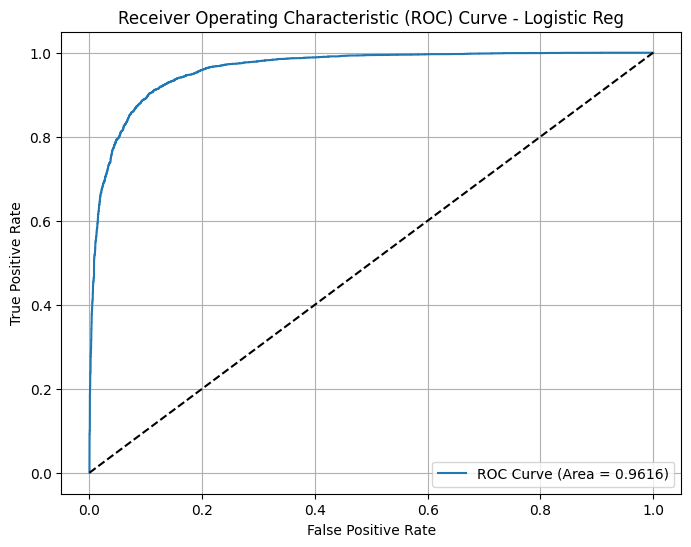

In [53]:
# try to plot roc/auc curve!
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (Area = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal representing random predictions

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Reg')
plt.legend(loc='lower right')

plt.grid() # set gridlines
plt.show()


### Visualize Predictions with Sample of Reviews & Evaluate Performance

We will now examine which words have influenced sentiment most thrugh looking at SHAP and creating some powerful visualizations

In [56]:
import shap
shap.initjs()

c:\Users\aadib\Coding Stuff\movie-review-sentiment-analyzer\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [57]:
# need to pass in model, vectorized training set, as well as feature names -> vocabulary in this case
explainer = shap.LinearExplainer(lr, X_train_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())

In [58]:
shap_values=explainer.shap_values(X_test_tfidf.toarray()[:200]) # for the first 200 examples, estimate the shap values for each feature (200 x n_features)

In [59]:
shap_values.shape

(200, 10000)

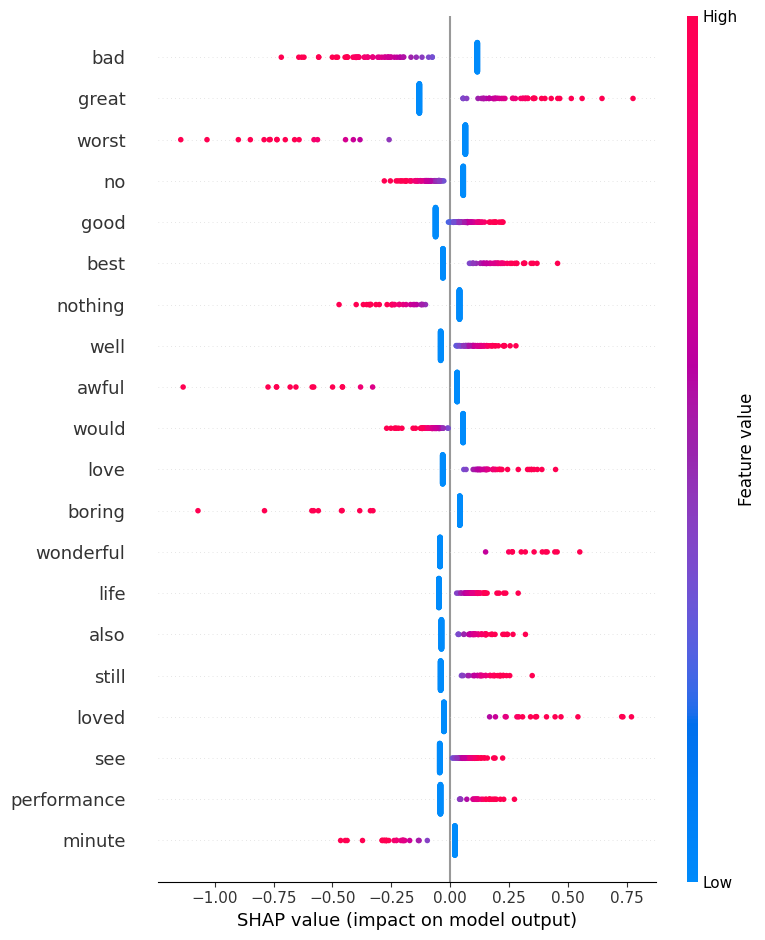

In [60]:
# create a summary plot (shows most important features globally for our set of 200 test examples)
shap.summary_plot(shap_values, X_test_tfidf.toarray()[:200], feature_names=tfidf_vectorizer.get_feature_names_out())

This is a really cool visual! It allows us to see which particular words are very influential in making the model predictions where typically more positive words like loved, excellent, and great contribute to a more positive SHAP value whereas more negative words like awful and worst have more negative SHAP values.

*Note: there are a variety of SHAP plots that can be created to examine what is influencing model predictions and aid in model interpretability*

In [62]:
# examine some reviews and compare predicted sentiment (>= 0.5 threshold) to actual label
test_indices = np.arange(0, y_test.shape[0]) # indices between 0 and y_test_size(12500)
np.random.seed(123)
random_indices = np.random.choice(test_indices, size=15, replace=False) # get 15 random indices without replacement


for i in random_indices:
    print(f'Review #{i+1}\n')
    
    # retrieve original index of review (before train test split)
    orig_index = idx_test[i]
    
    # retrieve original review using this index (before preprocessing)
    orig_review = X.loc[orig_index]
    
    print(orig_review) # retrieve original review (before vectorization)

    goodReview = True if predictions[i] == 1 else False
    
    actual = True if y_test[i] == 1 else False # since y_test is encoded into 0s and 1s

    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

    print('Actual: Is this a good review? {}\n'.format(actual))
    # print new line after
    print()

Review #9272

I am usually disappointed by network movies. Even flix that attract big name actors are usually ruined by the TV people. However, this one is the worst of the worst. The screenplay is weak and the acting, especially that of Tracey Pollan is abominable. I've trudged off to see my kids'high school plays and been treated to better acting. Pollan acts as if she is reading the script as she speaks. When she tries to express fear, anger or grief, it's extremely hollow. Because of the overall quality of the production I found it difficult to take it seriously. If you decide to brave this one just be prepared for a big disappointment. Scary things won't scare you, sad things won't make you sad, romance won't make you feel warm and fuzzy and you will likely be as anxious as I was to see the end arrive. "First to die" says a lot about this movie.

Prediction: Is this a good review? False

Actual: Is this a good review? False


Review #7396

This movie maybe really bad, but it is al

We can see out of this small sample, the model does pretty well, however we can also see that with some of the reviews it can get confused by the language and suffers from not being able to capture the context around certain words, which can be captured with a more advanced vectorizer (e.g. embeddings)

Let's now examine a positive and negative review which was predicted right, as well as a review which wasn't and then examine its corresponding waterfall plot (from SHAP) to gain more insight into why those predictions.

We will then perform this same analysis on a new review which has not been seen before that I pulled from the internet.

In [63]:
def test_rev_analysis (index): # the index corresponds to a value between 0-12499 (since size of test set is 12500)
    # for positive review
    idx_orig = idx_test[index]
    pos_rev_test = X.loc[idx_orig]

    print(pos_rev_test) # retrieve original review (before vectorization)
    goodReview = True if predictions[index] == 1 else False
    actual = True if y_test[index] == 1 else False # since y_test is encoded into 0s and 1s
    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 
    print('Actual: Is this a good review? {}\n'.format(actual))

    # notice we've only created shap_values for the first 200 reviews so if the index provided is out of range, we will have to calculate a new one
    vectorized = X_test_tfidf[index]

    if (index < 200):
        shap_value = shap_values[index]
    else:
        shap_value = explainer.shap_values(vectorized) # if it is not already calculated, then calculate it
        shap_value = shap_value[0]

    # examine its waterfall plot, first have to create an explanation object
    explanation = shap.Explanation(
        values=shap_value,
        base_values=explainer.expected_value,
        data=vectorized.toarray()[0],
        feature_names=tfidf_vectorizer.get_feature_names_out()
    )

    shap.plots.waterfall(explanation)

True Positive Review Example:
Hallelujah!!!! Finally, a true Colombian film crosses the border(s) to shows how Bogotá and Colombia really are! I am an American of Colombian and French heritage sick and tired of seeing Colombia so perversely and ignorantly portrayed by Hollywood and others.<br /><br />How many of you are aware that Colombia is the second oldest, uninterrupted democracy in the world (after the USA), or that it has a vibrant film and television industry (-to say nothing of Ugly Betty), that it's capital, Bogota (Pop. 9 Million) is the "world Capital of the Book," or that this beautiful city is host to the world's LARGEST International Theatre Festival? I hope that Doug Liman, Simon Kinberg (-Mr. & Mrs. Smith), Robert Zemeckis, Diane Thomas (Romancing the Stone) one day visit Bogotá, to see how wonderful it really is, and focus on Bogotá's cultural vitality and diversity, instead of myopically producing films such as Maria Full of Grace from which Joshua Marston profited 

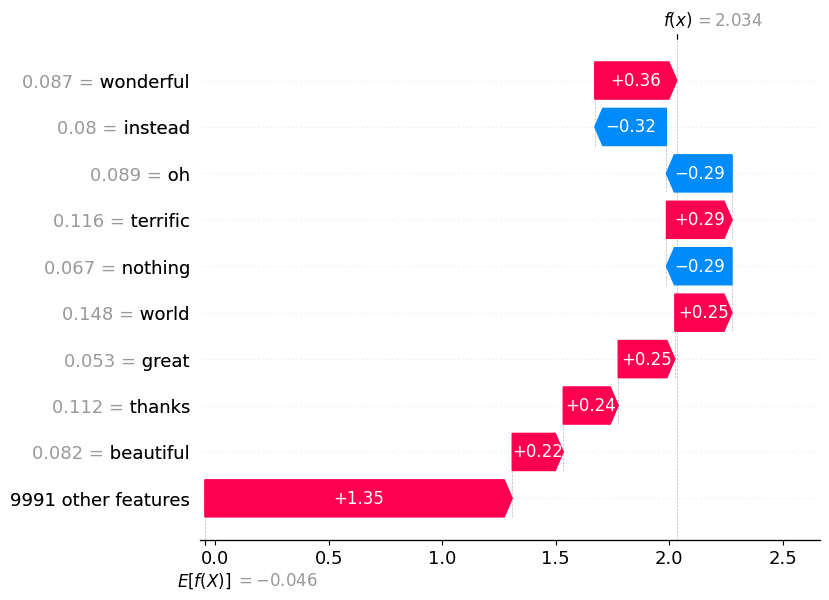

True Negative Review Example:
WOW! i didn't know that someone would make this movie! its awful! I have written down 5 things that can tell why u do not want to see this movie.<br /><br />number 1: "its the biggest rave ever" where is the that rave? i could only see a few people dancing around.. <br /><br />2. when they are on the rave,they can ONLY see blood everywhere,no people,two ruined tents and one stage.. and what do they do!? they drink!<br /><br />3.the worst actors i have ever seen! the captain and his crew.. awful! <br /><br />4. when one of the people is firing an ordinary gun, he shoots almost 30 times without reloading! <br /><br />5. i didn't knew every person in the world could fight as a pro! must be a new thing..<br /><br />i wonder what the producer was thinking! "this is going to be a big hit, its gonna be a classic" .. sure u dumb s**t anyway don't see this movie, its a waist of time. MY EYES ARE STILL BLEEDING!

Prediction: Is this a good review? False

Actual: Is 

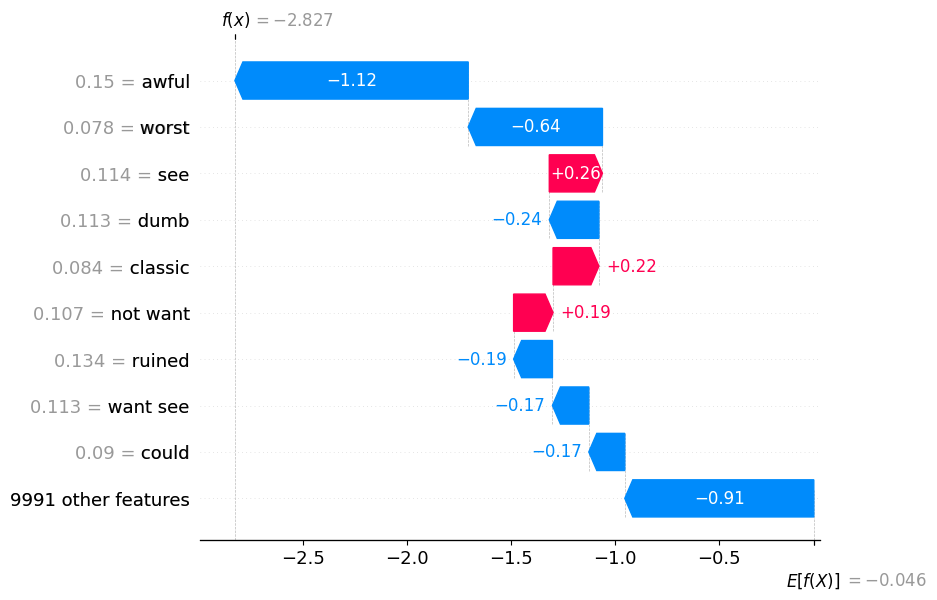

Incorrectly Predicted Review Example:
This movie maybe really bad, but it is alot of fun. The bad acting and poor direction enhance the film's hystericalness. The twins are very funny in their Conanesque roles. If you go into this film expecting the first Conan or Excalibur, than you will hate it. If you watch it while in a good mood and accept it as good, dumb fun you will have a good time. Watch for the scene where they try to hang the brothers, its funniest scene in the film. I wish Mystery Science Theatre 3000 would have done this!!

Prediction: Is this a good review? False

Actual: Is this a good review? True



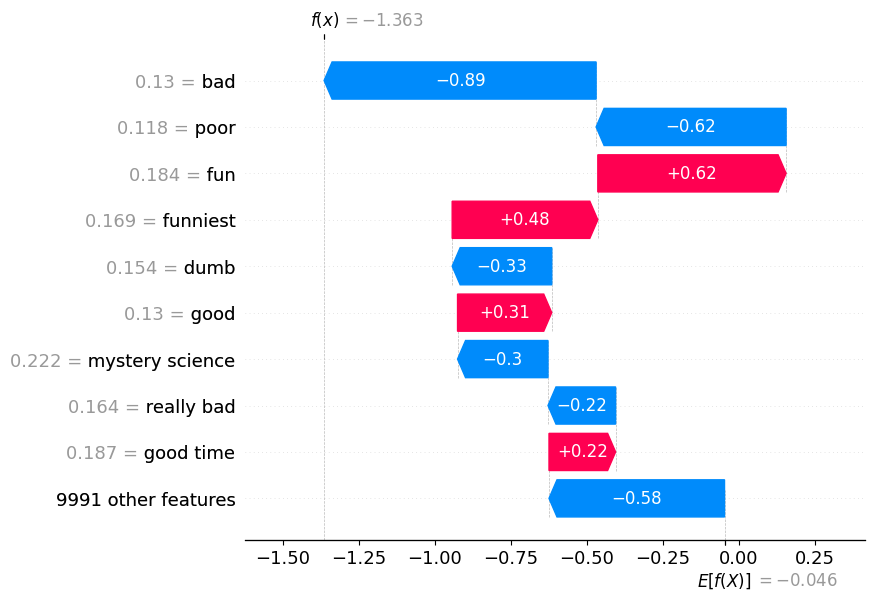

In [64]:
import random

# we know review #2796 (index 2795) is pretty clearly positive (from running the above code before) so lets perform this analysis on it
print('True Positive Review Example:')
test_rev_analysis(2795)

# lets grab a review from the test set which was negative and predicted correctly
true_neg_indices = [i for i, actual in enumerate(y_test) if actual == 0 and predictions[i] == 0]
# set seed for reproducability
random.seed(42)
true_neg_index = random.choice(true_neg_indices)

print('True Negative Review Example:')
test_rev_analysis(true_neg_index)

# let's now grab a review that the model didn't predict right, looks like above review 7396 (index 7395) is one example
print('Incorrectly Predicted Review Example:')
test_rev_analysis(7395)


These are very insightful! We can see in the case of the misclassified review that certain words like 'marine', and 'truck' (as well as the other features at bottom) contributed towards a positive prediction, increasing the overall SHAP value, while other words pushed it negatively like 'pathetic', 'noise' and even unusually the word 'great'. This overall resulted in a slightly positive SHAP value and weakly positive prediction, which explains why the model made that decision.

Let's write a function which runs our whole pipeline, including the SHAP values, on a review pulled from the internet.

In [66]:
def predict_new (review):
    # we need to first preprocess this review so it is interpretable by the model
    cleaned_review = preprocess(review)
    # now vectorize this cleaned review using the tfidf vectorizer we fit earlier
    vectorized_review = tfidf_vectorizer.transform([cleaned_review])

    # make our prediction
    prediction = lr.predict(vectorized_review)
    prob = lr.predict_proba(vectorized_review)

    # retrieve new shap values to showcase prediction
    shap_value = explainer.shap_values(vectorized_review)

    # display information
    print('Original Review: ', review)
    print('Processed Review: ', cleaned_review)

    goodReview = True if prediction == 1 else False
    print('\nPrediction: Is this a good review? {}\n'.format(goodReview)) 

    # # create the waterfall plot
    explanation = shap.Explanation(
        values=shap_value[0],
        base_values=explainer.expected_value,
        data=vectorized_review.toarray()[0], # remember to convert to array since it is a sparse matrix
        feature_names=tfidf_vectorizer.get_feature_names_out()
    )

    shap.waterfall_plot(explanation)


Original Review:  I know everyone wants to compare this to the Animated version, but don't. Take it as it comes and you will thoroughly enjoy it. It does stay pretty faithful to the animated version I think. Will Smith as the genie could never be the Robyn Williams genie, but I don't think he tries to. He does fantastically well in his own right. Absolutely loved the Prince Ali song where Aladdin enters the city as the prince. Brilliantly colorful spectacle captured really well. Jafar missed a little for me as had lost the smarmy-ness of the animated version. The songs were great and the Aladdin and Jasmine characterization was pretty spot on. I think kids would love this and I would definitely recommend it.
Processed Review:  know everyone want compare animated version not take come thoroughly enjoy stay pretty faithful animated version think smith genie could never robyn williams genie not think try fantastically well right absolutely loved prince ali song aladdin enters city prince 

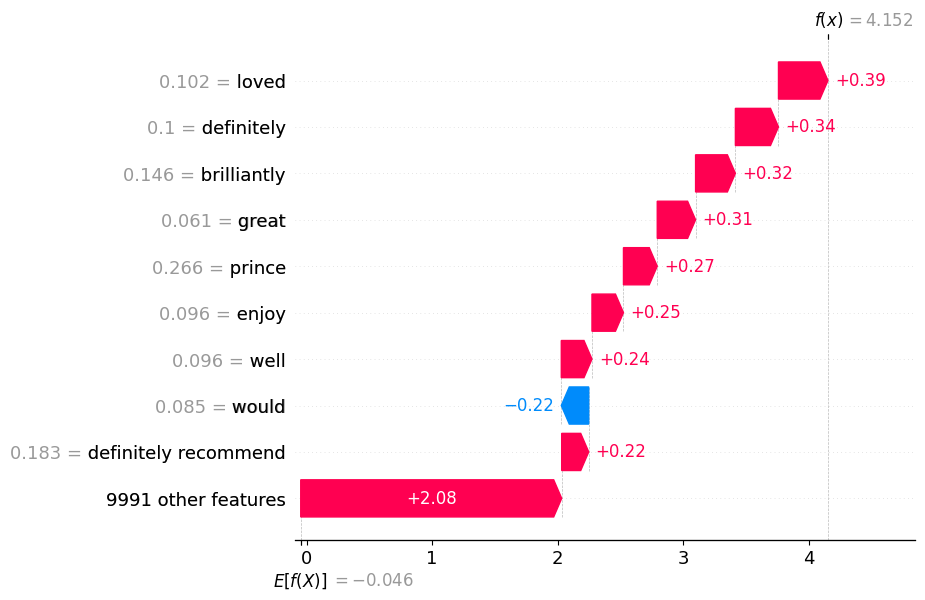

In [67]:
online_review_pos = "I know everyone wants to compare this to the Animated version, but don't. Take it as it comes and you will thoroughly enjoy it. It does stay pretty faithful to the animated version I think. Will Smith as the genie could never be the Robyn Williams genie, but I don't think he tries to. He does fantastically well in his own right. " \
"Absolutely loved the Prince Ali song where Aladdin enters the city as the prince. " \
"Brilliantly colorful spectacle captured really well. Jafar missed a little for me as had lost the smarmy-ness of the animated version. The songs were great and the Aladdin and Jasmine characterization was pretty spot on. I think kids would love this and I would definitely recommend it."

predict_new(online_review_pos)

Original Review:  This movie was absolutely terrible and boring.
Processed Review:  movie absolutely terrible boring

Prediction: Is this a good review? False



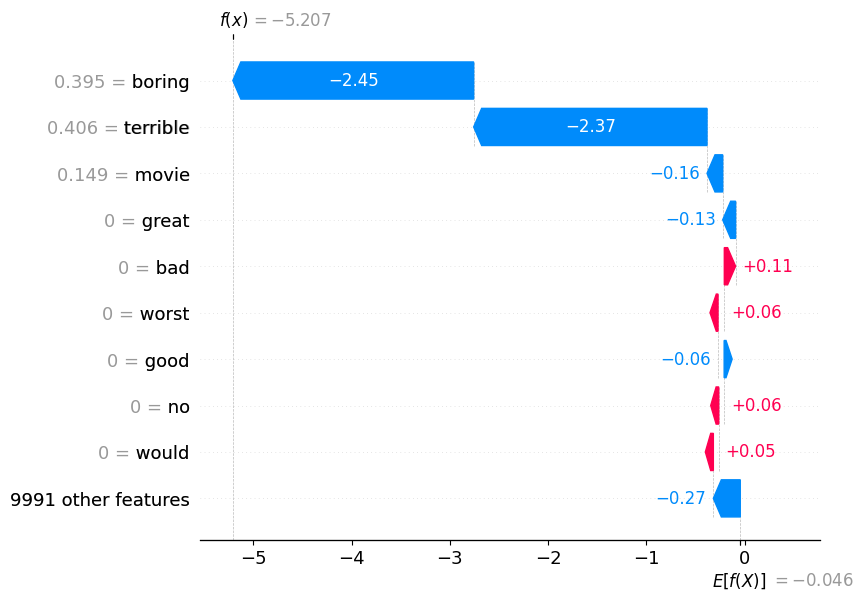

Original Review:  Best film I've seen all year! Highly recommend.
Processed Review:  best film seen year highly recommend

Prediction: Is this a good review? True



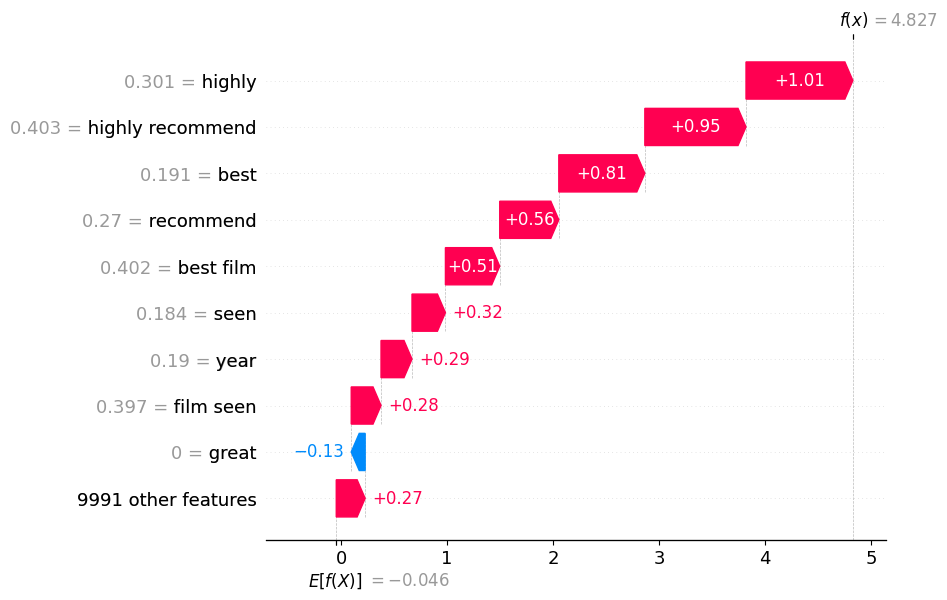

Original Review:  It was okay, nothing special but not bad either.
Processed Review:  okay nothing special not bad either

Prediction: Is this a good review? False



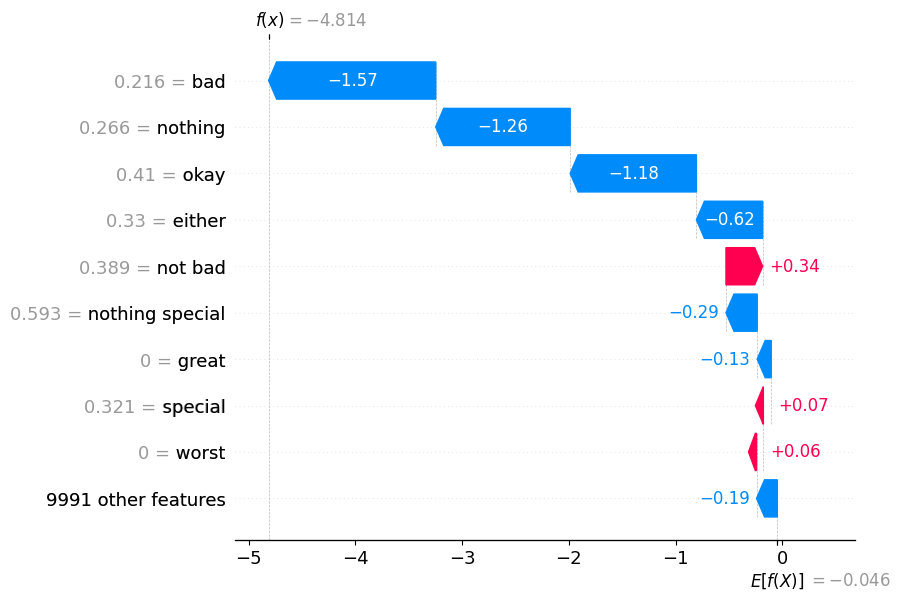

Original Review:  I hated every minute of it. Waste of time.
Processed Review:  hated every minute waste time

Prediction: Is this a good review? False



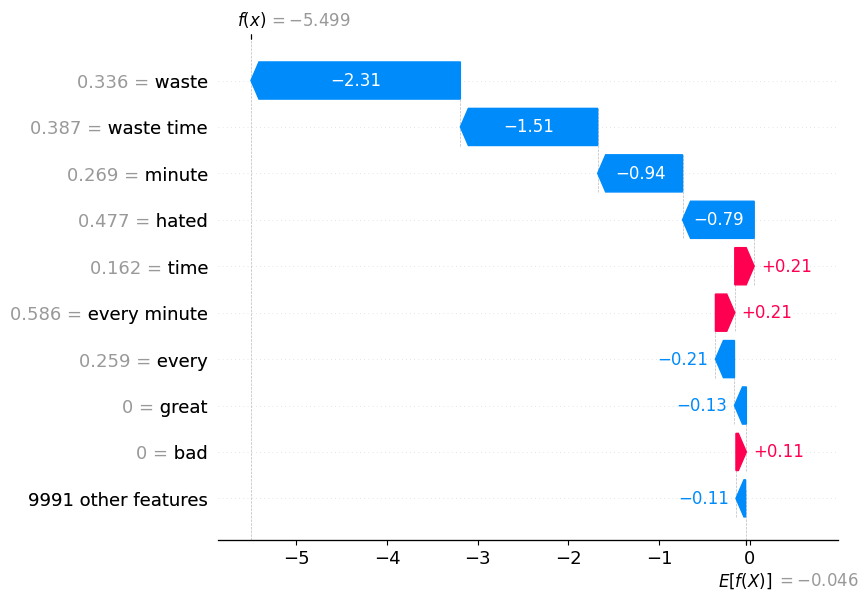

Original Review:  Incredible performance by the lead actor!
Processed Review:  incredible performance lead actor

Prediction: Is this a good review? True



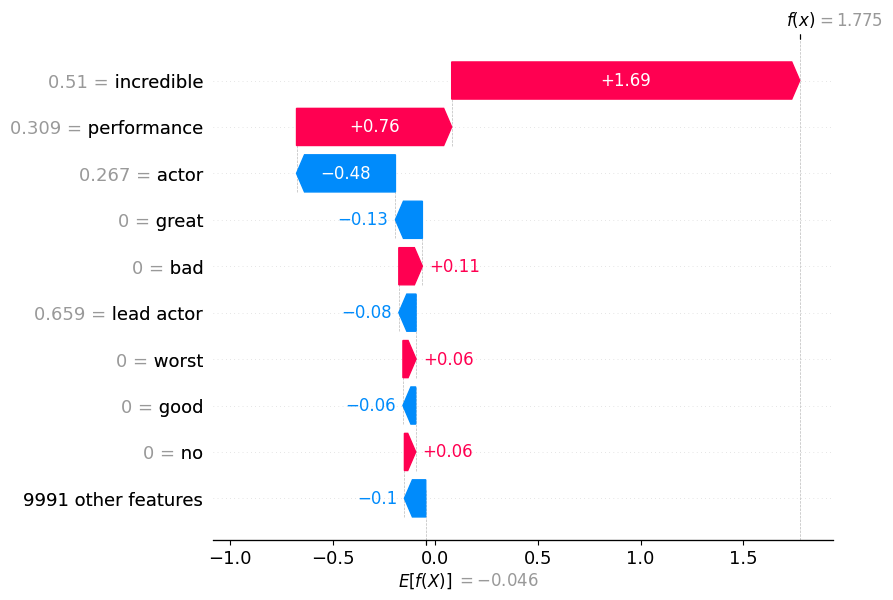

In [68]:
# Sanity test with hand-written reviews
test_reviews = [
    "This movie was absolutely terrible and boring.",
    "Best film I've seen all year! Highly recommend.",
    "It was okay, nothing special but not bad either.",
    "I hated every minute of it. Waste of time.",
    "Incredible performance by the lead actor!"
]

for review in test_reviews:
    predict_new(review)

The model does well on these, but we can see not having a 'neutral' class hurts it a little bit with the 3rd review. It does predict it as negative which is reasonable.

### Save Complete Pipeline for Production

In [73]:
# save as a pkl file, which serializes this python object
import joblib
from datetime import datetime

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Version your model (important for MLOps!)
version = "v1.0.0"
timestamp = datetime.now().strftime("%Y%m%d")

# Save individual components
joblib.dump(tfidf_vectorizer, f'models/tfidf_vectorizer_{version}.pkl')
joblib.dump(lr, f'models/logreg_model_{version}.pkl')
joblib.dump(explainer, f'models/shap_lin_explainer_{version}.pkl')

# Save complete pipeline (recommended for production)
pipeline_artifacts = {
    'vectorizer': tfidf_vectorizer,
    'model': lr,
    'explainer': explainer,
    'version': version,
    'training_date': timestamp,
    'metrics': { # retrieved from above
        'accuracy': 0.90,
        'auc': 0.96,
        'precision': 0.89,
        'recall': 0.91
    },
    'model_params': lr.get_params(),
    'vectorizer_params': tfidf_vectorizer.get_params(),
}

joblib.dump(pipeline_artifacts, f'models/sentiment_pipeline_{version}.pkl')

print(f"✅ Model saved: sentiment_pipeline_{version}.pkl")
print(f"   Size: {os.path.getsize(f'models/sentiment_pipeline_{version}.pkl') / 1024 / 1024:.2f} MB") # print the corresponding pipeline size as well

✅ Model saved: sentiment_pipeline_v1.0.0.pkl
   Size: 0.89 MB
